**NAME: NERELLA VENKATA RADHAKRISHNA**

**ID: 190031187**

**SKILL: 5**

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import stats
import seaborn as sns

In [3]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [5]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

Text(0, 0.5, 'Frequency')

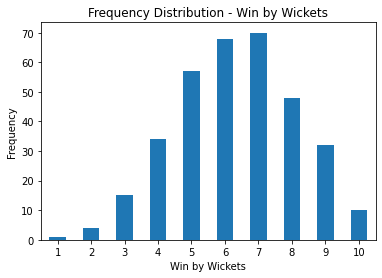

In [6]:
win_by_wickets_data = matches[matches.win_by_wickets>0].win_by_wickets
win_by_wickets_fre = win_by_wickets_data.value_counts(sort=False)
plt = win_by_wickets_fre.plot.bar(rot=0)
plt.set_title('Frequency Distribution - Win by Wickets')
plt.set_xlabel('Win by Wickets')
plt.set_ylabel('Frequency')

Text(0, 0.5, 'Relative Frequency')

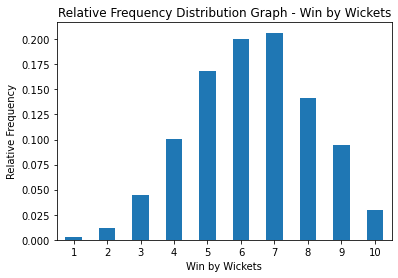

In [7]:
win_by_wickets_rel_fre = win_by_wickets_data.value_counts(sort=False, normalize=True)
plt = win_by_wickets_rel_fre.plot.bar(rot=0)
plt.set_title('Relative Frequency Distribution Graph - Win by Wickets')
plt.set_xlabel('Win by Wickets')
plt.set_ylabel('Relative Frequency')

Text(0, 0.5, 'Cumulative Relative Frequency')

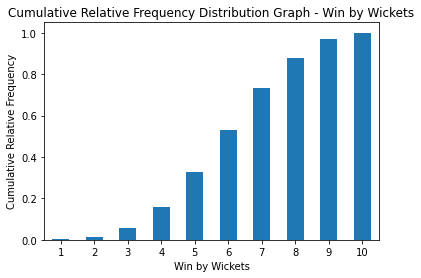

In [8]:
win_by_wickets_cumulative_fre = win_by_wickets_data.value_counts(sort=False, normalize=True).cumsum()
plt = win_by_wickets_cumulative_fre.plot.bar(rot=0)
plt.set_title('Cumulative Relative Frequency Distribution Graph - Win by Wickets')
plt.set_xlabel('Win by Wickets')
plt.set_ylabel('Cumulative Relative Frequency')

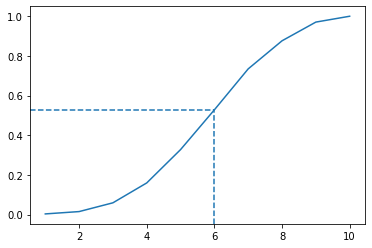

In [10]:
plt=win_by_wickets_cumulative_fre.plot.line()
plt.axhline(y=win_by_wickets_cumulative_fre[6],xmax=5.5/10,linestyle="dashed")
plt.axvline(x=6,ymax=win_by_wickets_cumulative_fre[6],linestyle="dashed")

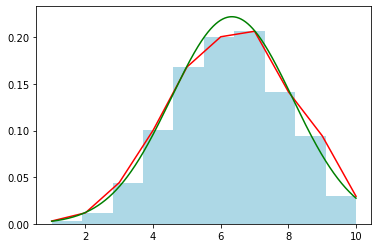

In [11]:
#Get Mean and Std
win_by_wickets_mean ,win_by_wickets_std = win_by_wickets_data.mean(), win_by_wickets_data.std()

#Plot histogram (normalized) - LIGHTBLUE
win_by_wickets_data.hist(color='lightblue', weights= np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count())

#Plot line graph - RED
win_by_wickets_data.value_counts(sort=False,normalize=True).plot.line(color='red')

#Normal distribution for random points between 1 to 10 with means, std
random_data = np.arange(1,10,0.001)
pyplot.plot(random_data, stats.norm.pdf(random_data,win_by_wickets_mean, win_by_wickets_std), color='green')